In [1]:
# EDA e Visualização de Dados
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

# ML
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

### Carregar os dados

In [2]:
# Carregar Dataframe
df_countries = pd.read_csv('./datasets/Country_Data.csv', sep=';', decimal=',')

In [3]:
# Analisar a estrutura
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          165 non-null    object 
 1   child_mort       165 non-null    float64
 2   exports          165 non-null    float64
 3   health           165 non-null    float64
 4   imports          165 non-null    float64
 5   income           165 non-null    int64  
 6   inflation        165 non-null    float64
 7   life_expec       165 non-null    float64
 8   total_fer        165 non-null    float64
 9   gdpp             165 non-null    int64  
 10  income_category  165 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 14.3+ KB


In [4]:
# Visualizar os primeiros registros
df_countries.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Low income
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Upper middle income
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Lower middle income
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Lower middle income
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,High income


In [5]:
# Visualizar os últimos registros
df_countries.tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category
160,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,Lower middle income
161,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Lower middle income
162,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Lower middle income
163,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Low income
164,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,Lower middle income


### EDA

### Análise Univariada

In [6]:
# Estatísticas das variáveis
df_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,38.567273,41.193327,6.825576,46.999793,17183.412121,7.585612,70.505455,2.959818,13011.963636
std,40.480851,27.560749,2.759425,24.233083,19389.968166,10.198185,8.935045,1.518166,18428.279743
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.900000,23.800000,4.930000,30.400000,3340.000000,1.770000,65.300000,1.800000,1310.000000
50%,19.700000,35.000000,6.320000,43.300000,9940.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.200000,51.400000,8.650000,58.900000,22900.000000,10.600000,76.800000,3.910000,14600.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Distribuição da variável income_category
percentual_income_category = df_countries.value_counts('income_category') / len(df_countries) * 100
px.bar(percentual_income_category, color=percentual_income_category.index)

In [8]:
# Distribuição da variável income
px.histogram(df_countries['income'], title='Histograma da variável Income')

In [9]:
# Distribuição da variável GDPP (PIB per capita)
px.histogram(df_countries['gdpp'], title='Histograma da variável GDPP')

In [10]:
# Distribuição da variável inflation
px.histogram(df_countries['inflation'], title='Histograma da variável inflation')

In [11]:
# Distribuição da variável Life Expectation
px.histogram(df_countries['life_expec'], title='Histograma da variável Life Expectation')

### Análise Bivariada

In [12]:
# Plot de Distribuição (BoxPlot) por income e income_category
px.box(df_countries, x='income', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [13]:
# Plot de Distribuição (BoxPlot) por gdpp e income_category
px.box(df_countries, x='gdpp', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [14]:
# Plot de Distribuição (BoxPlot) por inflation e income_category
px.box(df_countries, x='inflation', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [15]:
# Plot de Distribuição (BoxPlot) por life_expec e income_category
px.box(df_countries, x='life_expec', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [16]:
# Scatterplot de Income e GDPP
px.scatter(df_countries, x='income', y='gdpp', color='income_category', hover_data=['country'])

In [17]:
# Gerar Matriz de Correlação
matriz_correlacao_countries = df_countries.corr(numeric_only=True)

<Axes: >

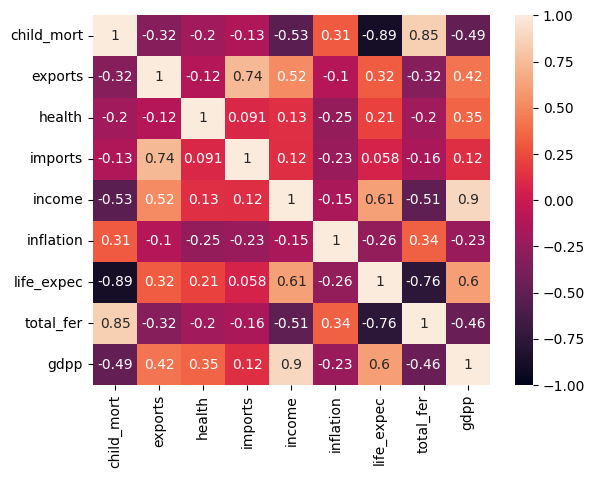

In [18]:
# Plotar Matriz de Correlação
sns.heatmap(matriz_correlacao_countries, vmin=-1, vmax=1, annot=True)

### Treinar o algoritmo PCA

In [19]:
# Selecionar as colunas para PCA
X = df_countries.copy()

# Remover colunas desnecessárias
X.drop(columns=['country', 'income_category'], axis=1, inplace=True)

In [20]:
# Separarando variáveis quantitativas
numeric_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [21]:
# Definir transformações
numeric_transformer = StandardScaler()

In [22]:
# Criar Pre Processador de Transformações
preprocessor = ColumnTransformer(
  transformers=[
    ('num', numeric_transformer, numeric_features)
  ]
)

In [23]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [24]:
# Visualizar X_transformed
X_transformed

array([[ 1.27936799, -1.13524796,  0.2742313 , ..., -1.6059239 ,
         1.88970656, -0.67813658],
       [-0.54431031, -0.48015711, -0.10017109, ...,  0.65049307,
        -0.86538974, -0.48561903],
       [-0.27918316, -0.10166017, -0.96529507, ...,  0.67294498,
        -0.04612849, -0.46548008],
       ...,
       [-0.37829611,  1.12117608,  0.00524318, ...,  0.29126251,
        -0.66718138, -0.63693336],
       [ 0.43938573, -0.40736924, -0.59816262, ..., -0.33739098,
         1.12990782, -0.63693336],
       [ 1.1034425 , -0.15261168, -0.34007942, ..., -2.07741401,
         1.61221484, -0.62876892]])

In [25]:
# Matriz de Covariância
np.cov(X_transformed)

array([[ 1.28101845, -0.30929073, -0.13299078, ..., -0.31162981,
         0.6038062 ,  1.11986219],
       [-0.30929073,  0.19023088,  0.05718309, ...,  0.14855132,
        -0.14287309, -0.40453184],
       [-0.13299078,  0.05718309,  0.3368898 , ...,  0.03260987,
         0.28911912, -0.02412952],
       ...,
       [-0.31162981,  0.14855132,  0.03260987, ...,  0.5954005 ,
        -0.08211639, -0.23881978],
       [ 0.6038062 , -0.14287309,  0.28911912, ..., -0.08211639,
         0.71221987,  0.6856765 ],
       [ 1.11986219, -0.40453184, -0.02412952, ..., -0.23881978,
         0.6856765 ,  1.231984  ]])

In [26]:
# Criar modelo PCA
modelo_pca = PCA(n_components=2)

In [27]:
# Executar PCA
X_pca = modelo_pca.fit_transform(X_transformed)

In [28]:
# Gerar um dataframe com base nos componentes principais
# df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [29]:
# Visualizar componentes principais
df_pca.head(5)

,PC1,PC2
0,-2.898491,0.043830
1,0.435969,-0.602095
2,-0.294489,-0.393013
3,-2.941128,1.746346
4,1.038913,0.117437


In [30]:
# Verificar tamanho do Dataframe de PCA
len(df_pca)

165

In [31]:
# Incluir componentes principais no dataframe original
df_countries['PC1'] = df_pca['PC1']
df_countries['PC2'] = df_pca['PC2']
# df_countries['PC3'] = df_pca['PC3']

In [32]:
# Mostrar Dataframe original com Componentes Principais
df_countries.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category,PC1,PC2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Low income,-2.898491,0.043830
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Upper middle income,0.435969,-0.602095
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Lower middle income,-0.294489,-0.393013
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Lower middle income,-2.941128,1.746346
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,High income,1.038913,0.117437


### Visualizar Resultados

In [33]:
# Autovalores
autovetores = modelo_pca.explained_variance_

# Autovetores
autovalores = modelo_pca.components_

print("Autovetores:")
print(autovetores)
print("\nAutovalores:")
print(autovalores)

Autovetores:
[4.18194258 1.55676483]

Autovalores:
[[-0.41944537  0.28242091  0.15068193  0.16069962  0.39721431 -0.20064752
   0.42542863 -0.40370133  0.39213733]
 [ 0.18639458  0.61906392 -0.26537269  0.6623149   0.03301443  0.03814569
  -0.21355639  0.15172601 -0.04196516]]


In [34]:
# Mostrar Chart 3D com os componentes principais
# fig = px.scatter_3d(df_countries, x='PC1', y='PC2', z='PC3', color='income_category', title='Visualização PCA', width=800, height=600, hover_data=['country'])
# fig.show()

In [35]:
# Gráfico 2D (PCA com 2 componentes principais)
px.scatter(df_countries, x='PC1', y='PC2', color='income_category',hover_data=['country'])

In [36]:
# Reconstruir os dados com base no PCA
X_recovered = modelo_pca.inverse_transform(X_pca)

In [37]:
# Visualizar Recovered
X_recovered.shape[1]

9

In [38]:
# Calcular o erro de reconstrução
reconstruction_error = mean_squared_error(X_transformed, X_recovered)
print("Erro de Recontrução: ", reconstruction_error)

Erro de Recontrução:  0.3662302934326459


### Salvar Modelo

In [39]:
import joblib

# Salvar Modelo
joblib.dump(modelo_pca, './model.pkl')

# Salvar Preprocessor
joblib.dump(preprocessor, './preprocessor.pkl')

['./preprocessor.pkl']